In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cars = np.random.uniform(low=0, high=1, size=(100,2));
stations = np.random.uniform(low=0, high=1, size=(10,2));

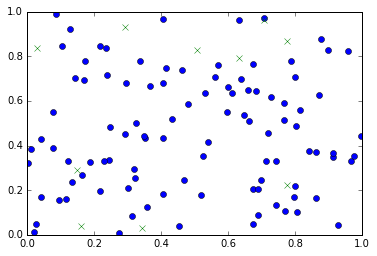

In [3]:
plt.plot(cars[:,0], cars[:,1], 'o', stations[:,0], stations[:,1], 'x');

100 cars(Blue dot) and 10 stations(green cross)

In [4]:
from scipy.spatial.distance import cdist

In [5]:
dist_car2station = cdist( cars, stations, metric="euclidean" );
dist_car2car = cdist( cars, cars, metric="euclidean" );

In [6]:
dist_car2station_missing = dist_car2station.copy();

In [7]:
missing = np.random.uniform(low=0, high=1, size=(100,10));

In [8]:
# impute missing distance by average
dist_car2station_missing[missing>0.9]=np.NaN;
for j in range(0, dist_car2station_missing.shape[1]):
    station = dist_car2station_missing[:,j];
    avg = np.nanmean(dist_car2station_missing[:,j]);
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=avg
np.nansum(abs(dist_car2station_missing - dist_car2station))

18.299738300808382

In [9]:
# impute missing distance by non-missing distance of THE nearest car 
dist_car2station_missing[missing>0.9]=np.NaN;
for j in range(0, dist_car2station_missing.shape[1]):
    station = dist_car2station_missing[:,j];
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=station[np.argwhere(station>0).T[0][np.argmin(dist_car2car[i,np.argwhere(station>0).T[0]])]]
np.nansum(abs(dist_car2station_missing - dist_car2station))

3.5521123523334475

In [14]:
# impute missing distance by average non-missing of top n cars 
dist_car2station_missing[missing>0.9]=np.NaN;
# set the top n
n=4;
for j in range(0, dist_car2station_missing.shape[1]):
    station = dist_car2station_missing[:,j];
    for i in range(0,station.size):
        if np.isnan(station[i]):
            station[i]=np.mean(station[np.argwhere(station>0).T[0][np.argsort(dist_car2car[i,np.argwhere(station>0).T[0]])[0:n]]])
np.nansum(abs(dist_car2station_missing - dist_car2station))

3.1909340605427898